In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\logistic regession\Data_Sets\weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
columns=df.columns

In [9]:
#splliting numerical and categorical columns
df_num=df.select_dtypes(include=["number"]).columns
df_cat=df.select_dtypes(include=["object"]).columns

In [10]:
df.shape

(142193, 24)

<Axes: >

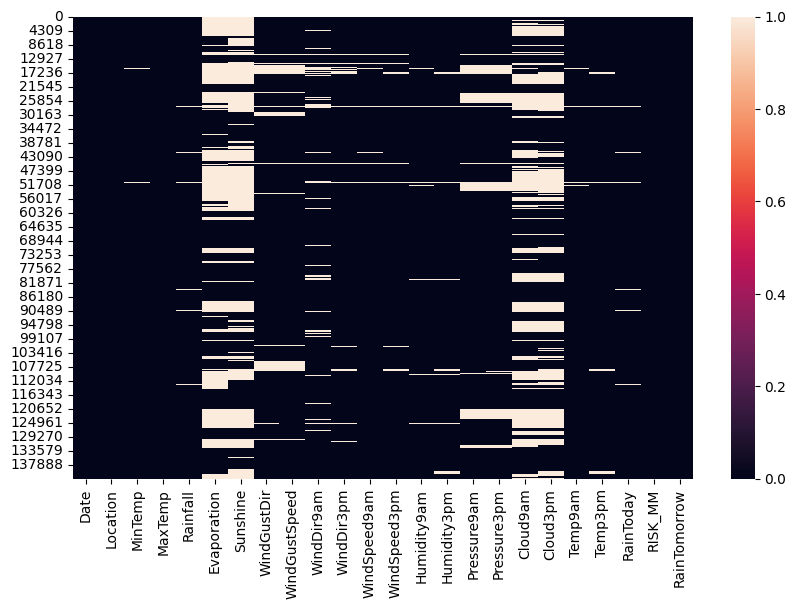

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
df_num.shape,df_cat.shape

((17,), (7,))

In [13]:
df[df_num].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
dtype: int64

In [14]:
df["MinTemp"]=df["MinTemp"].fillna(df["MinTemp"].median())

In [15]:
#replacing all columns with the respective median 
for i in df_num:
    df[i]=df[i].fillna(df[i].median())

In [16]:
df[df_num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

<Axes: >

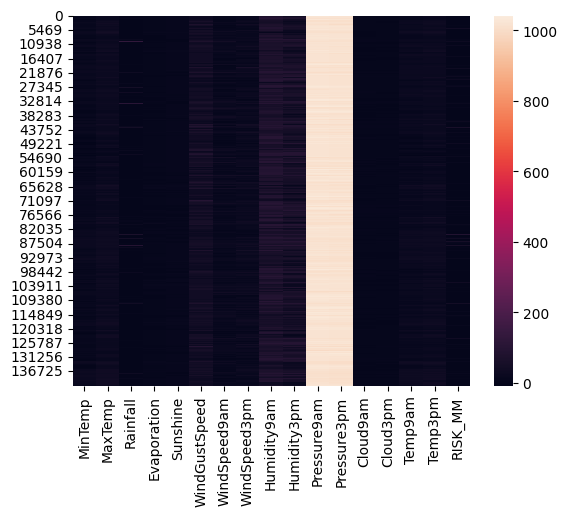

In [17]:
sns.heatmap(df[df_num])

In [18]:
df[df_cat].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [19]:
df["Location"]=df["Location"].fillna(df["Location"].ffill())

In [20]:
for i in df_cat:
    df[i]=df[i].fillna(df[i].ffill())

In [21]:
df[df_cat].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [22]:
df.isnull().sum().sum()
#no null values

np.int64(0)

<Axes: >

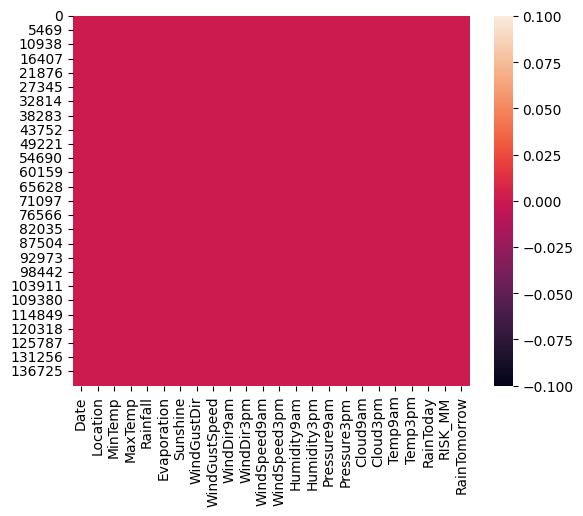

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.duplicated().sum()
#no dupliocated values

np.int64(0)

<Axes: >

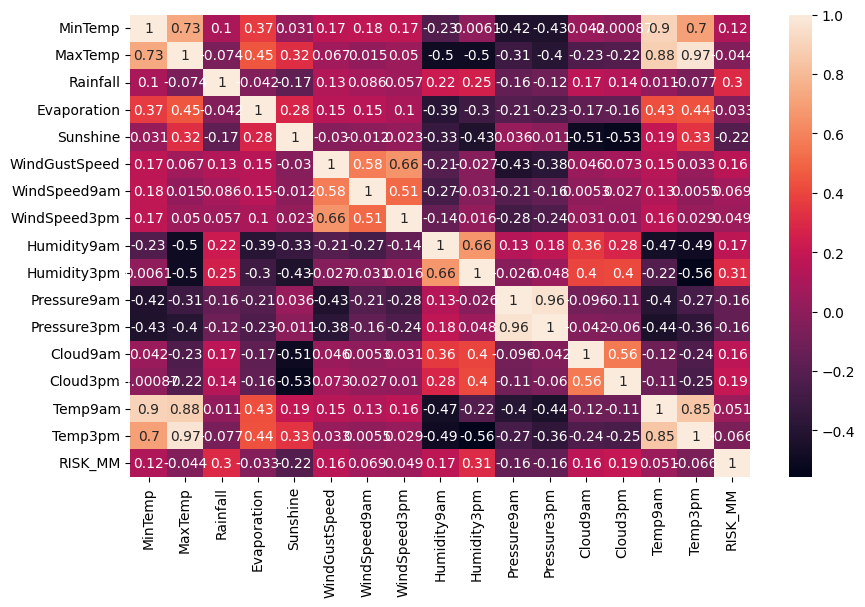

In [25]:
#seeing the correlation
plt.figure(figsize=(10,6))
sns.heatmap(df[df_num].corr(),annot=True)

In [26]:
df_num

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

<Axes: xlabel='Temp3pm', ylabel='Count'>

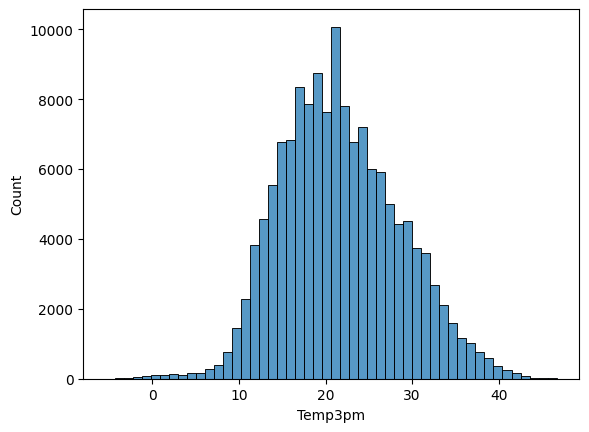

In [27]:
sns.histplot(df["Temp3pm"],bins=50)

In [28]:
#sns.pairplot(df[df_num])

In [29]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

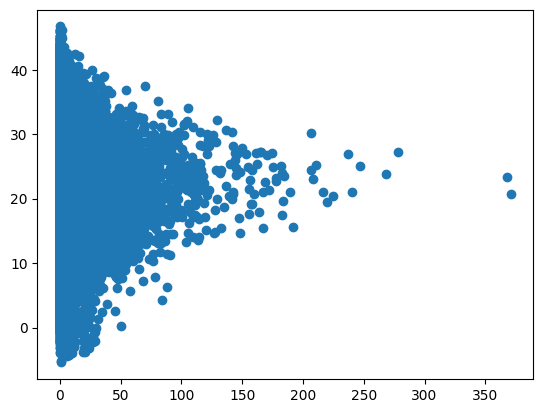

In [30]:
plt.scatter(df["RISK_MM"],df["Temp3pm"])

<Axes: xlabel='RainTomorrow', ylabel='count'>

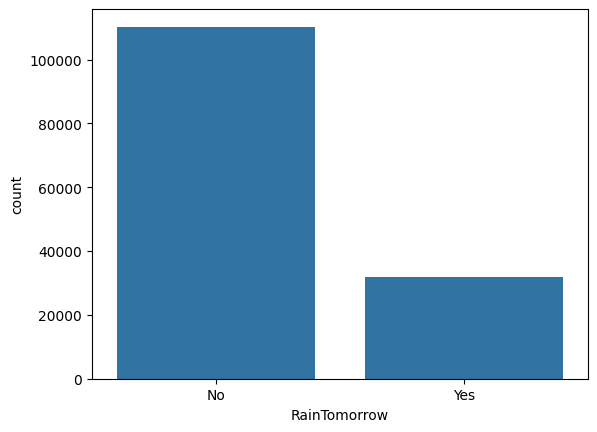

In [31]:
sns.countplot(x="RainTomorrow",data=df)

<Axes: xlabel='RainToday', ylabel='count'>

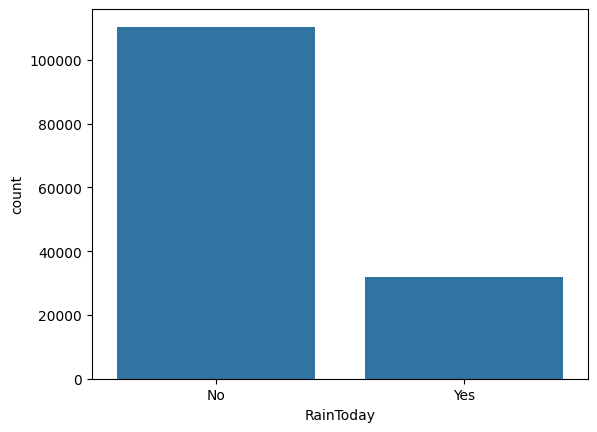

In [32]:
sns.countplot(x="RainToday",data=df)

<Axes: >

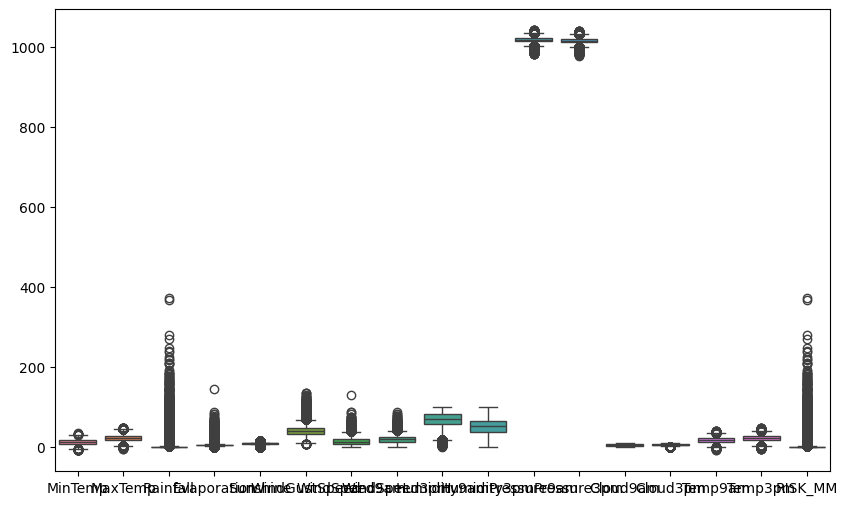

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df_num])

In [34]:
from feature_engine.outliers import OutlierTrimmer
df[df_num]=OutlierTrimmer(capping_method="iqr").fit_transform(df[df_num])

<Axes: >

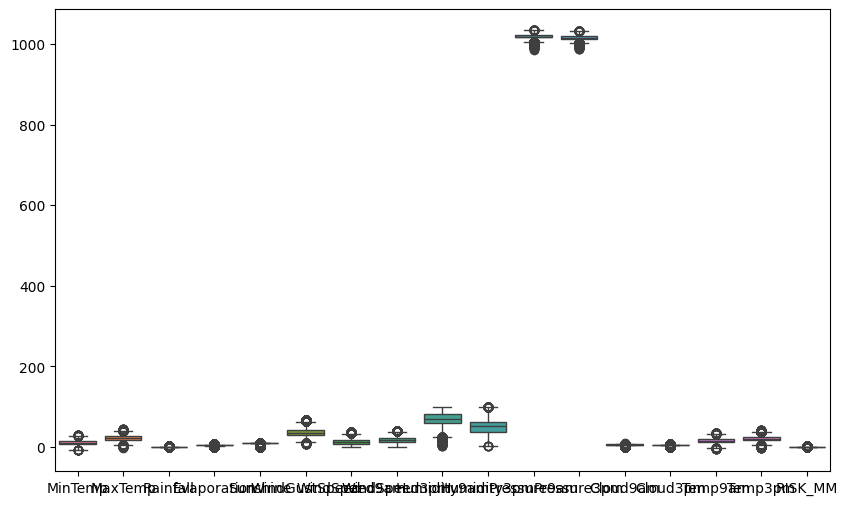

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df_num])

In [36]:
#encoding
from feature_engine.encoding import OneHotEncoder
df_cat=OneHotEncoder().fit_transform(df[df_cat])


In [37]:
df_cat.columns

Index(['Date', 'Location_Albury', 'Location_BadgerysCreek', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Moree', 'Location_Newcastle',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith',
       ...
       'WindDir3pm_SW', 'WindDir3pm_SE', 'WindDir3pm_N', 'WindDir3pm_S',
       'WindDir3pm_NNE', 'WindDir3pm_NE', 'RainToday_No', 'RainToday_Yes',
       'RainTomorrow_No', 'RainTomorrow_Yes'],
      dtype='object', length=102)

In [38]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [39]:
df_num

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [40]:
df["MinTemp"].unique()
df["MinTemp"]=df["MinTemp"].fillna(0)

In [41]:
for i in df_num:
    df[i]=df[i].fillna(0)

In [42]:
df_cat.head()

,Date,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,...,WindDir3pm_SW,WindDir3pm_SE,WindDir3pm_N,WindDir3pm_S,WindDir3pm_NNE,WindDir3pm_NE,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,2008-12-01,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2008-12-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2008-12-03,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2008-12-04,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2008-12-05,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
df_cat.drop("Date",axis=1,inplace=True)

In [44]:
df[df_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142193 non-null  float64
 1   MaxTemp        142193 non-null  float64
 2   Rainfall       142193 non-null  float64
 3   Evaporation    142193 non-null  float64
 4   Sunshine       142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindSpeed9am   142193 non-null  float64
 7   WindSpeed3pm   142193 non-null  float64
 8   Humidity9am    142193 non-null  float64
 9   Humidity3pm    142193 non-null  float64
 10  Pressure9am    142193 non-null  float64
 11  Pressure3pm    142193 non-null  float64
 12  Cloud9am       142193 non-null  float64
 13  Cloud3pm       142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RISK_MM        142193 non-null  float64
dtypes: float64(17)
memory usage: 

In [45]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 101 entries, Location_Albury to RainTomorrow_Yes
dtypes: int64(101)
memory usage: 109.6 MB


In [46]:
df_dep=df_cat[['RainToday_No', 'RainToday_Yes','RainTomorrow_No', 'RainTomorrow_Yes']]

In [47]:
df_dep.columns

Index(['RainToday_No', 'RainToday_Yes', 'RainTomorrow_No', 'RainTomorrow_Yes'], dtype='object')

In [48]:
df_cat=df_cat.drop(['RainToday_No', 'RainToday_Yes','RainTomorrow_No', 'RainTomorrow_Yes'],axis=1)

In [49]:
import numpy as np
x=df[df_num].combine_first(df_cat)
y=df["RainTomorrow"]
y

0         No
1         No
2         No
3         No
4         No
          ..
142188    No
142189    No
142190    No
142191    No
142192    No
Name: RainTomorrow, Length: 142193, dtype: object

In [50]:
print(x.columns.value_counts().sum())
print(x.columns.values.dtype)

114
object


Logistic regression

In [51]:
#logistic model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,train_size=0.85)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120864, 114), (21329, 114), (120864,), (21329,))

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [53]:
y_predict=model.predict(x_test)
y_predict

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
      shape=(21329,), dtype=object)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.7915514088799287
[[15062  1491]
 [ 2955  1821]]


knearest neighbours

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
y_predict_knn=model_knn.predict(x_test)
y_predict_knn

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(21329,), dtype=object)

In [57]:
print(accuracy_score(y_test,y_predict_knn))
print(confusion_matrix(y_test,y_predict_knn))

0.795114632659759
[[14847  1706]
 [ 2664  2112]]


support vector classification

In [58]:
from sklearn.svm import LinearSVC
model_svm=LinearSVC()
model_svm.fit(x_train,y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [59]:
y_predict_svm=model_svm.predict(x_test)
y_predict_svm

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'],
      shape=(21329,), dtype=object)

In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_predict_svm))
print(confusion_matrix(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8210417741103662
[[15563   990]
 [ 2827  1949]]
              precision    recall  f1-score   support

          No       0.85      0.94      0.89     16553
         Yes       0.66      0.41      0.51      4776

    accuracy                           0.82     21329
   macro avg       0.75      0.67      0.70     21329
weighted avg       0.81      0.82      0.80     21329



Linear regression

In [66]:
#df["RainTomorrow"]
#label encoding
from sklearn.preprocessing import LabelEncoder
ylin=LabelEncoder().fit_transform(df["RainTomorrow"])

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,ylin,random_state=42,train_size=0.853)
from statistics import linear_regression
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
y_predict_lin=model_lin.predict(x_test)
y_predict_lin

array([ 0.53021415, -0.01343095,  0.21823123, ...,  0.35191256,
       -0.0772425 ,  0.44134995], shape=(20903,))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_absolute_error(y_test,y_predict_lin))
print(mean_squared_error(y_test,y_predict_lin))
print(r2_score(y_test,y_predict_lin))
#getting very low score so this model is not good for this

0.2834069174456951
0.12480059072595437
0.27332937024798576
